In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.arima_model import ARIMA
from sklearn.metrics import mean_squared_error
from pandas.plotting import autocorrelation_plot

C:\Users\lingaselvan\AppData\Local\Continuum\Anaconda2\lib\site-packages\statsmodels\compat\pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


In [3]:
coloumn_no = 1
df = pd.read_excel('C:\Users\lingaselvan\Documents\Python Scripts\Data\shampoo_data.xlsx')
series = []
for i in range(len(df)):
    series.append(df.iloc[i,coloumn_no])
print "First value in series : ", series[0], series[1]
print "Last value in series : ", series[len(df)-1]
print "Length of series: ", len(series)

First value in series :  266.0 145.9
Last value in series :  646.9
Length of series:  36


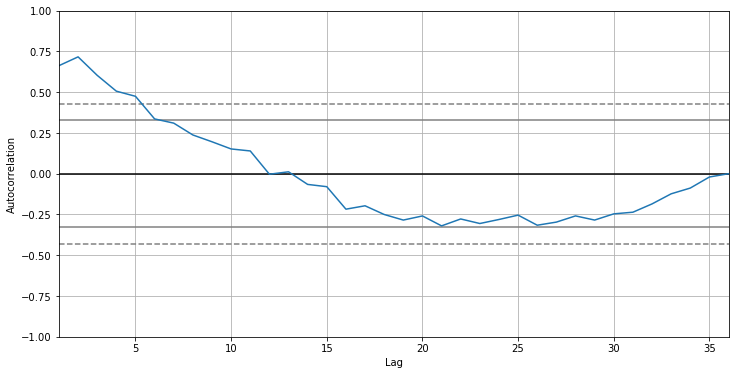

In [4]:
plt.figure(figsize=(12, 6));
autocorrelation_plot(series)
plt.show()

In [10]:
X = series
size = int(len(X) * 0.66)
train, test = X[0:size], X[size:len(X)]
history = [x for x in train]
predictions = list()
for t in range(len(test)):
    model = ARIMA(history, order=(5,1,0))
    model_fit = model.fit(disp=0)
    output = model_fit.forecast()
    yhat = output[0]
    predictions.append(yhat)
    obs = test[t]
    history.append(obs)
    print('predicted=%f, expected=%f' % (yhat, obs))
error = mean_squared_error(test, predictions)
print('Test MSE: %.3f' % error)

predicted=349.117652, expected=342.300000
predicted=306.512938, expected=339.700000
predicted=387.376378, expected=440.400000
predicted=348.154245, expected=315.900000
predicted=386.308790, expected=439.300000
predicted=356.082135, expected=401.300000
predicted=446.379456, expected=437.400000
predicted=394.737380, expected=575.500000
predicted=434.915449, expected=407.600000
predicted=507.923475, expected=682.000000
predicted=435.482971, expected=475.300000
predicted=652.743799, expected=581.300000
predicted=546.343507, expected=646.900000
Test MSE: 6958.321


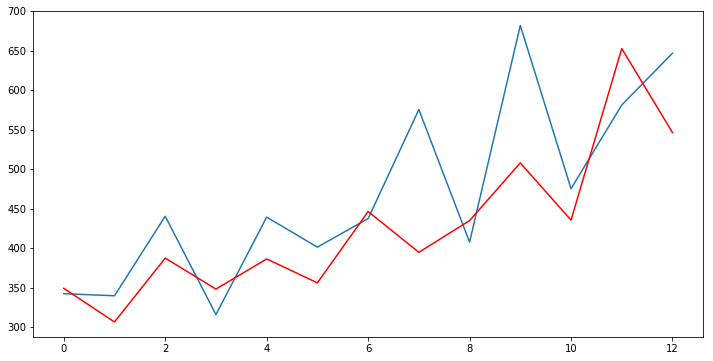

In [11]:
# plot
plt.figure(figsize=(12, 6));
plt.plot(test)
plt.plot(predictions, color='red')
plt.show()